In [1]:
import numpy as np
import gvar as gv
import sys
import matplotlib.pyplot as plt
#matplotlib.rcParams['figure.figsize'] = [10, 8]


#import warnings  
#warnings.simplefilter(action="default")

sys.path.append('../')
import fitter.data_loader as dl
import fitter.fit_manager as fm
import fitter.fitter as fit

In [2]:
from importlib import reload
reload(dl)
reload(fm)
reload(fit)

<module 'fitter.fitter' from '/Users/nolan/Documents/research/project_scale_setting_mdwf_hisq/notebooks/../fitter/fitter.py'>

In [3]:
prior = {}
prior['w0'] = gv.BufferDict()

# const
prior['w0']['c0'] = gv.gvar('1(1)')

# lo
prior['w0']['A_l'] = gv.gvar('1(1)')
prior['w0']['A_s'] = gv.gvar('1(1)')
prior['w0']['A_a'] = gv.gvar('-0.5(2.0)')

# nlo
prior['w0']['A_aa'] = gv.gvar('0(1)')
prior['w0']['A_al'] = gv.gvar('0(1)')
prior['w0']['A_as'] = gv.gvar('0(1)')
prior['w0']['A_ll'] = gv.gvar('0(1)')
prior['w0']['A_ss'] = gv.gvar('0(1)')
prior['w0']['A_ls'] = gv.gvar('0(1)')

# n2lo
prior['w0']['A_aaa'] = gv.gvar('0(1)')
prior['w0']['A_aal'] = gv.gvar('0(1)')
prior['w0']['A_aas'] = gv.gvar('0(1)')
prior['w0']['A_all'] = gv.gvar('0(1)')
prior['w0']['A_als'] = gv.gvar('0(1)')
prior['w0']['A_ass'] = gv.gvar('0(1)')
prior['w0']['A_lll'] = gv.gvar('0(1)')
prior['w0']['A_lls'] = gv.gvar('0(1)')
prior['w0']['A_lss'] = gv.gvar('0(1)')
prior['w0']['A_sss'] = gv.gvar('0(1)')

# alpha_S term
prior['w0']['A_alpha'] = gv.gvar('0(0.7)')

# log terms
prior['w0']['A_ll_g'] = gv.gvar('0(1)')
prior['w0']['A_lll_g']  = gv.gvar('0(1)')
prior['w0']['A_lll_gg'] = gv.gvar('0(1)')
prior['w0']['A_lls_g'] = gv.gvar('0(1)')

model_info = {}
model_info['name'] = 'test'
model_info['order']  = 'n2lo'
model_info['latt_ct'] = 'nlo'
model_info['include_log'] = True
model_info['include_log2'] = True
model_info['include_fv'] = True
model_info['include_alphas'] = True
model_info['exclude'] = ['A_aaa',]
model_info['chiral_cutoff'] = 'Fpi'
model_info['eps2a_defn'] = 't0_original'

In [4]:
data_loader = dl.data_loader('2020_12_09-improved_variable_w0orig', use_charm_reweighting=False)
gv_data = data_loader.gv_data
model_info = data_loader.get_model_info_from_name('Fpi_n3lo_fv_w0impr')
prior = data_loader.get_prior(model_info=model_info)
phys_point_data = data_loader.phys_point_data

In [5]:
fit_manager = fm.fit_manager(
    phys_point_data=phys_point_data, 
    fit_data=gv_data, 
    model_info=model_info,
    prior=prior, 
    simultaneous=True)

In [6]:
fitter = fit_manager.fitter['w0t0']
print(fitter.fit)

Least Square Fit:
  chi2/dof [dof] = 0.91 [44]    Q = 0.64    logGBF = 154.34

Parameters:
         w0::c0        1.104 (65)       [       1.0 (1.0) ]  
        w0::A_l         0.97 (30)       [       1.0 (1.0) ]  
        w0::A_s         1.26 (37)       [       1.0 (1.0) ]  
        w0::A_a        -0.65 (30)       [       0.0 (1.2) ]  
       w0::A_aa        -0.47 (56)       [       0.0 (1.2) ]  
       w0::A_al        -1.26 (90)       [       0.0 (1.2) ]  *
       w0::A_as         0.78 (88)       [       0.0 (1.2) ]  
       w0::A_ll        -0.32 (85)       [       0.0 (1.0) ]  
       w0::A_ls         0.72 (87)       [       0.0 (1.0) ]  
       w0::A_ss        -0.66 (76)       [       0.0 (1.0) ]  
      w0::A_aaa        -0.91 (93)       [       0.0 (1.0) ]  
      w0::A_aal        -0.18 (97)       [       0.0 (1.0) ]  
      w0::A_aas         0.07 (96)       [       0.0 (1.0) ]  
      w0::A_all         0.01 (99)       [       0.0 (1.0) ]  
      w0::A_als        -0.31 (98)       

In [7]:
np.log(0.1)

-2.3025850929940455

In [9]:
fitter = fit_manager.fitter['w0t0']
print(fitter._make_empbayes_fit('order'))


1   {('w0', 'chiral_nlo'): 0.0, ('t0', 'chiral_nlo'): 0.0, ('w0', 'chiral_n2lo'): 0.0, ('t0', 'chiral_n2lo'): 0.0, ('w0', 'chiral_n3lo'): 0.0, ('t0', 'chiral_n3lo'): 0.0, ('w0', 'latt_nlo'): 0.0, ('t0', 'latt_nlo'): 0.0, ('w0', 'latt_n2lo'): 0.0, ('t0', 'latt_n2lo'): 0.0, ('w0', 'latt_n3lo'): 0.0, ('t0', 'latt_n3lo'): 0.0}
2   {('w0', 'chiral_nlo'): 0.00025, ('t0', 'chiral_nlo'): 0.0, ('w0', 'chiral_n2lo'): 0.0, ('t0', 'chiral_n2lo'): 0.0, ('w0', 'chiral_n3lo'): 0.0, ('t0', 'chiral_n3lo'): 0.0, ('w0', 'latt_nlo'): 0.0, ('t0', 'latt_nlo'): 0.0, ('w0', 'latt_n2lo'): 0.0, ('t0', 'latt_n2lo'): 0.0, ('w0', 'latt_n3lo'): 0.0, ('t0', 'latt_n3lo'): 0.0}
3   {('w0', 'chiral_nlo'): 0.0, ('t0', 'chiral_nlo'): 0.00025, ('w0', 'chiral_n2lo'): 0.0, ('t0', 'chiral_n2lo'): 0.0, ('w0', 'chiral_n3lo'): 0.0, ('t0', 'chiral_n3lo'): 0.0, ('w0', 'latt_nlo'): 0.0, ('t0', 'latt_nlo'): 0.0, ('w0', 'latt_n2lo'): 0.0, ('t0', 'latt_n2lo'): 0.0, ('w0', 'latt_n3lo'): 0.0, ('t0', 'latt_n3lo'): 0.0}
4   {('w0', 'chir

In [10]:
'w0::c0'.split('::')


['w0', 'c0']

In [10]:
    def _empbayes_groupings(self):
        zkeys = {}

        if self.empbayes_grouping == 'all':
            for param in self.prior:
                if param != 'c0': # Have a good prior for this already
                    zkeys[param] = [param]

        elif self.empbayes_grouping == 'order':
            zkeys['chiral_nlo'] = ['A_l', 'A_s']
            zkeys['chiral_n2lo'] = ['A_ll', 'A_ss', 'A_ls', 'A_ll_g']
            zkeys['chiral_n3lo'] = ['A_lll', 'A_lls', 'A_lss', 'A_sss', 'A_lll_g', 'A_lls_g', 'A_lll_gg']
            zkeys['latt_nlo'] = ['A_a', 'A_alpha']
            zkeys['latt_n2lo'] = ['A_aa', 'A_al', 'A_as']
            zkeys['latt_n3lo'] = ['A_aaa', 'A_aal', 'A_aas', 'A_all', 'A_als', 'A_ass']

        elif self.empbayes_grouping == 'disc':
            zkeys['chiral'] = ['A_l', 'A_s', 'A_ll', 'A_ss', 'A_ls', 'A_ll_g', 'A_lll', 'A_lls', 'A_lss', 'A_sss', 'A_lll_g', 'A_lls_g', 'A_lll_gg']
            zkeys['disc'] = ['A_a', 'A_alpha', 'A_aa', 'A_al', 'A_as', 'A_aaa', 'A_aal', 'A_aas', 'A_all', 'A_als', 'A_ass']

        elif self.empbayes_grouping == 'alphas':
            zkeys['alphas'] = ['A_alpha']

        elif self.empbayes_grouping == 'alphas_eps2a':
            zkeys['alphas'] = ['A_alpha', 'A_a']

        elif self.empbayes_grouping == 'disc_only':
            zkeys['disc'] = ['A_a', 'A_aa', 'A_al', 'A_as']

        all_keys = [obs+'::'+key for key in [k for g in zkeys for k in zkeys[g]] for obs in self.observables]
        prior_keys = list(self._make_prior())
        ignored_keys = set(all_keys) - set(prior_keys)

        # Don't determine empirical priors in param not in model
        for group in zkeys:
            for key in ignored_keys:
                if key in ignored_keys and key in zkeys[group]:
                    zkeys[group].remove(key)

        # Remove empty groupings
        for group in list(zkeys):
            if len(zkeys[group]) == 0:
                del(zkeys[group])
        
        return zkeys

    _empbayes_groupings(fitter)

{'chiral': ['A_l',
  'A_s',
  'A_ll',
  'A_ss',
  'A_ls',
  'A_ll_g',
  'A_lll',
  'A_lls',
  'A_lss',
  'A_sss',
  'A_lll_g',
  'A_lls_g',
  'A_lll_gg'],
 'disc': ['A_a',
  'A_alpha',
  'A_aa',
  'A_al',
  'A_as',
  'A_aaa',
  'A_aal',
  'A_aas',
  'A_all',
  'A_als',
  'A_ass']}

In [12]:
    import lsqfit

    def _make_fitargs(self, z):
        y_data = {self.model_info['name']+'_'+obs : self.y[obs] for obs in self.observables}
        prior = self._make_prior()

        # Ideally:
            # Don't bother with more than the hundredth place
            # Don't let z=0 (=> null GBF)
            # Don't bother with negative values (meaningless)
        # But for some reason, these restrictions (other than the last) cause empbayes_fit not to converge
        multiplicity = {}
        for key in z:
            multiplicity[key] = 0
            z[key] = np.abs(z[key])


        # Helps with convergence (minimizer doesn't use extra digits -- bug in lsqfit?)
        sig_fig = lambda x : np.around(x, int(np.floor(-np.log10(x))+3)) # Round to 3 sig figs
        capped = lambda x, x_min, x_max : np.max([np.min([x, x_max]), x_min])

        zkeys = self._empbayes_groupings()
        zmin = 1e-2
        zmax = 1e3
        for group in z.keys():
            for param in prior.keys():
                if param in zkeys[group]:
                    z[group] = sig_fig(capped(z[group], zmin, zmax))
                    prior[param] = gv.gvar(0, 1) *z[group]

        self._counter['iters'] += 1
        print(self._counter['iters'], ' ', z)#{key : np.round(1. / z[key], 8) for key in z.keys()})

        # Penalize models outside logGBF
        def plausibility(s):
            plaus = 0
            for key in s:
                k = 1 / np.log(z_max[key]/z_min[key])
                plaus -= np.log(k/s[key]) *multiplicity[key]

            return plaus

        plaus = 0# plausibility(z)
        #print(plaus)

        return (dict(data=y_data, prior=prior), plaus)

    def _make_empbayes_fit(self, empbayes_grouping='order'):
        if (self._empbayes_fit is None) or (empbayes_grouping != self.empbayes_grouping):
            self.empbayes_grouping = empbayes_grouping
            self._counter = {'iters' : 0, 'evals' : 0}

            z0 = gv.BufferDict()
            for group in self._empbayes_groupings():
                z0[group] = 1.0


            # Might need to change minargs default values for empbayes_fit to converge:
            # tol=1e-8, svdcut=1e-12, debug=False, maxit=1000, add_svdnoise=False, add_priornoise=False
            # Note: maxit != maxfev. See https://github.com/scipy/scipy/issues/3334
            # For Nelder-Mead algorithm, maxfev < maxit < 3 maxfev?

            # For debugging. Same as 'callback':
            # https://github.com/scipy/scipy/blob/c0dc7fccc53d8a8569cde5d55673fca284bca191/scipy/optimize/optimize.py#L651
            def analyzer(arg):
                self._counter['evals'] += 1
                print("\nEvals: ", self._counter['evals'], arg,"\n")
                print(type(arg[0]))
                return None

            models = self._make_models()

            fitter = lsqfit.MultiFitter(models=models)
            y_data = {self.model_info['name']+'_'+obs : self.y[obs] for obs in self.observables}
            prior = self._make_prior()
            fit = fitter.lsqfit(data=y_data, prior=prior, fast=False, mopt=False)

            fit,z = fitter.empbayes_fit(z0, fitargs=(lambda b : _make_fitargs(self, b)), maxit=200, analyzer=None)
            print(z)
            self._empbayes_fit = fit

        return self._empbayes_fit

    print(_make_empbayes_fit(fitter, empbayes_grouping='order'))

1   {'chiral_nlo': 1.0, 'chiral_n2lo': 1.0, 'chiral_n3lo': 1.0, 'latt_nlo': 1.0, 'latt_n2lo': 1.0, 'latt_n3lo': 1.0}
2   {'chiral_nlo': 1.05, 'chiral_n2lo': 1.0, 'chiral_n3lo': 1.0, 'latt_nlo': 1.0, 'latt_n2lo': 1.0, 'latt_n3lo': 1.0}
3   {'chiral_nlo': 1.0, 'chiral_n2lo': 1.05, 'chiral_n3lo': 1.0, 'latt_nlo': 1.0, 'latt_n2lo': 1.0, 'latt_n3lo': 1.0}
4   {'chiral_nlo': 1.0, 'chiral_n2lo': 1.0, 'chiral_n3lo': 1.05, 'latt_nlo': 1.0, 'latt_n2lo': 1.0, 'latt_n3lo': 1.0}
5   {'chiral_nlo': 1.0, 'chiral_n2lo': 1.0, 'chiral_n3lo': 1.0, 'latt_nlo': 1.05, 'latt_n2lo': 1.0, 'latt_n3lo': 1.0}
6   {'chiral_nlo': 1.0, 'chiral_n2lo': 1.0, 'chiral_n3lo': 1.0, 'latt_nlo': 1.0, 'latt_n2lo': 1.05, 'latt_n3lo': 1.0}
7   {'chiral_nlo': 1.0, 'chiral_n2lo': 1.0, 'chiral_n3lo': 1.0, 'latt_nlo': 1.0, 'latt_n2lo': 1.0, 'latt_n3lo': 1.05}
8   {'chiral_nlo': 1.0166666666666666, 'chiral_n2lo': 1.0166666666666666, 'chiral_n3lo': 1.0166666666666666, 'latt_nlo': 1.0166666666666666, 'latt_n2lo': 1.0166666666666666, '

In [7]:
fit_manager.prior

{'w0': {'w0::A_a': 0.0(1.2),
  'w0::A_aa': 0.0(1.2),
  'w0::A_aaa': 0.0(1.0),
  'w0::A_aal': 0.0(1.0),
  'w0::A_aas': 0.0(1.0),
  'w0::A_al': 0.0(1.2),
  'w0::A_all': 0.0(1.0),
  'w0::A_als': 0.0(1.0),
  'w0::A_as': 0.0(1.2),
  'w0::A_ass': 0.0(1.0),
  'w0::A_l': 1.0(1.0),
  'w0::A_ll': 0.0(1.0),
  'w0::A_lll': 0.0(1.0),
  'w0::A_lls': 0.0(1.0),
  'w0::A_ls': 0.0(1.0),
  'w0::A_lss': 0.0(1.0),
  'w0::A_s': 1.0(1.0),
  'w0::A_ss': 0.0(1.0),
  'w0::A_sss': 0.0(1.0),
  'w0::c0': 1.0(1.0)},
 't0': {'t0::A_a': 0.0(1.8),
  't0::A_aa': 0.0(1.8),
  't0::A_aaa': 0.0(1.0),
  't0::A_aal': 0.0(1.0),
  't0::A_aas': 0.0(1.0),
  't0::A_al': 0.0(1.8),
  't0::A_all': 0.0(1.0),
  't0::A_als': 0.0(1.0),
  't0::A_as': 0.0(1.8),
  't0::A_ass': 0.0(1.0),
  't0::A_l': 1.0(1.0),
  't0::A_ll': 0.0(1.0),
  't0::A_lll': 0.0(1.0),
  't0::A_lls': 0.0(1.0),
  't0::A_ls': 0.0(1.0),
  't0::A_lss': 0.0(1.0),
  't0::A_s': 1.0(1.0),
  't0::A_ss': 0.0(1.0),
  't0::A_sss': 0.0(1.0),
  't0::c0': 1.0(1.0)}}

In [8]:
    def _get_error_budget(self, verbose=False, **kwargs):
        output = None

        for observable in ['w0', 't0']:
            # Fill these out
            disc_keys = ['A_a', 'A_alpha', 'A_aa', 'A_al', 'A_as', 'A_aaa', 'A_aal', 'A_aas', 'A_all', 'A_als', 'A_ass']
            chiral_keys = ['c0', 'A_l', 'A_s', 'A_ll', 'A_ls', 'A_ss', 'A_ll_g', 'A_lll', 'A_lls', 'A_lss', 'A_sss', 'A_lll_g', 'A_lls_g', 'A_lll_gg']
            phys_keys = list(self.phys_point_data)
            stat_key = 'lam_chi' # Since the input data is correlated, only need a single variable as a proxy for all

            if verbose:
                if output is None:
                    output = ''

                inputs = {}

                # xpt/chiral contributions
                inputs.update({str(param)+' [disc]' : self.prior[observable][param] for param in disc_keys if param in self.prior[observable]})
                inputs.update({str(param)+' [xpt]' : self.prior[observable][param] for param in chiral_keys if param in self.prior[observable]})

                # phys point contributions
                inputs.update({str(param)+' [pp]' : self.phys_point_data[param] for param in list(phys_keys)})
                del inputs['lam_chi [pp]']

                # stat contribtions
                inputs.update({'x [stat]' : self._get_prior(stat_key)[observable] , 'y [stat]' : self.fitter[observable].y})
                
                if kwargs is None:
                    kwargs = {}
                kwargs.setdefault('percent', False)
                kwargs.setdefault('ndecimal', 10)
                kwargs.setdefault('verify', True)

                if observable == 'w0':
                    output += 'observable: ' + observable + '\n' + gv.fmt_errorbudget(outputs={'w0' : self.w0}, inputs=inputs, **kwargs) + '\n---\n'
                elif observable == 't0':
                    output += 'observable: ' + observable + '\n' + gv.fmt_errorbudget(outputs={'t0' : self.sqrt_t0}, inputs=inputs, **kwargs) + '\n---\n'

            else: 
                if output is None:
                    output = {}

                output[observable] = {}
                if observable == 'w0':
                    value = self.w0

                elif observable == 't0':
                    value = self.sqrt_t0

                output[observable]['disc'] = value.partialsdev(
                    [self.prior[observable][key] for key in disc_keys if key in self.prior[observable]]
                )
                output[observable]['chiral'] = value.partialsdev(
                    [self.prior[observable][key] for key in chiral_keys if key in self.prior[observable]]
                )
                output[observable]['pp_input'] = value.partialsdev(
                    [self.phys_point_data[key] for key in phys_keys]
                )
                output[observable]['stat'] = value.partialsdev(
                    [self._get_prior(stat_key)[observable], self.fitter[observable].y]
                    #self.fitter['w0'].y
                )


        return output

    _get_error_budget(fit_manager)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/nmiller/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_45008/792167304.py", line 67, in <cell line: 67>
    _get_error_budget(fit_manager)
  File "/tmp/ipykernel_45008/792167304.py", line 45, in _get_error_budget
    value = self.w0
  File "/mnt/storage/research/project_scale_setting_mdwf_hisq/notebooks/../fitter/fit_manager.py", line 267, in w0
    return self.fitfcn(fit_data=self.phys_point_data.copy(), observable='w0') / self.phys_point_data['mO'] *self.phys_point_data['hbarc']
  File "/mnt/storage/research/project_scale_setting_mdwf_hisq/notebooks/../fitter/fit_manager.py", line 330, in fitfcn
    return model.fitfcn(p=posterior, fit_data=fit_data, xi=xi, debug=debug)
  File "/mnt/storage/research/project_scale_setting_mdwf_hisq/notebooks/../fitter/fitter.py", line 415, in fitfcn
KeyError: 'w0::c0'

During handl

In [6]:
fitter = fit_manager.fitter['w0']
fitter._make_empbayes_fit('disc')

1   {'chiral': 1.0, 'disc': 1.0}


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [9]:
print(fitter.fit)

Least Square Fit:
  chi2/dof [dof] = 0.91 [44]    Q = 0.64    logGBF = 154.34

Parameters:
         w0::c0        1.104 (65)       [       1.0 (1.0) ]  
        w0::A_l         0.97 (30)       [       1.0 (1.0) ]  
        w0::A_s         1.26 (37)       [       1.0 (1.0) ]  
        w0::A_a        -0.65 (30)       [       0.0 (1.2) ]  
       w0::A_aa        -0.47 (56)       [       0.0 (1.2) ]  
       w0::A_al        -1.26 (90)       [       0.0 (1.2) ]  *
       w0::A_as         0.78 (88)       [       0.0 (1.2) ]  
       w0::A_ll        -0.32 (85)       [       0.0 (1.0) ]  
       w0::A_ls         0.72 (87)       [       0.0 (1.0) ]  
       w0::A_ss        -0.66 (76)       [       0.0 (1.0) ]  
      w0::A_aaa        -0.91 (93)       [       0.0 (1.0) ]  
      w0::A_aal        -0.18 (97)       [       0.0 (1.0) ]  
      w0::A_aas         0.07 (96)       [       0.0 (1.0) ]  
      w0::A_all         0.01 (99)       [       0.0 (1.0) ]  
      w0::A_als        -0.31 (98)       

In [8]:
fit_manager.model_info

{'name': 'Fpi_n3lo_fv_w0impr',
 'chiral_cutoff': 'Fpi',
 'order': 'n3lo',
 'latt_ct': 'n3lo',
 'include_log': False,
 'include_log2': False,
 'include_fv': True,
 'include_alphas': False,
 'exclude': [],
 'eps2a_defn': 'w0_improved'}

In [7]:
print(fit_manager)

Model: Fpi_n3lo_fv_w0impr
---

w0: 0.1710(10)

w0/a06: 2.998(15)     => a06/fm: 0.05704(50)
w0/a09: 1.9557(68)    => a09/fm: 0.08744(68)
w0/a12: 1.4155(33)    => a12/fm: 0.12082(84)
w0/a15: 1.1341(14)    => a15/fm: 0.15080(97)

Parameters:
             c0      1.068 (70)      [     1.0 (1.0) ]  
            A_l       1.04 (32)      [     1.0 (1.0) ]  
            A_s       1.49 (40)      [     1.0 (1.0) ]  
            A_a      -0.64 (32)      [     0.0 (1.2) ]  
           A_aa      -0.62 (57)      [     0.0 (1.2) ]  
           A_al      -1.41 (94)      [     0.0 (1.2) ]  *
           A_as       0.89 (91)      [     0.0 (1.2) ]  
           A_ll      -0.42 (93)      [     0.0 (1.0) ]  
           A_ls       0.51 (90)      [     0.0 (1.0) ]  
           A_ss      -0.94 (78)      [     0.0 (1.0) ]  
          A_aaa      -0.30 (96)      [     0.0 (1.0) ]  
          A_aal      -0.20 (99)      [     0.0 (1.0) ]  
          A_aas      -0.03 (96)      [     0.0 (1.0) ]  
          A_all   

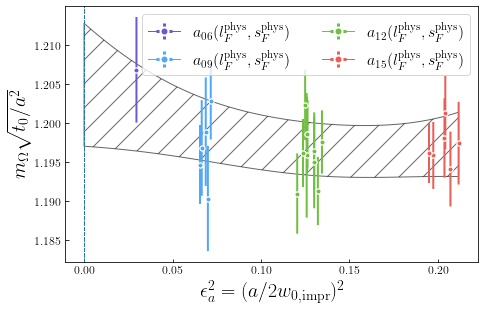

In [7]:
fit_manager.plot_fit('a', observable='t0')

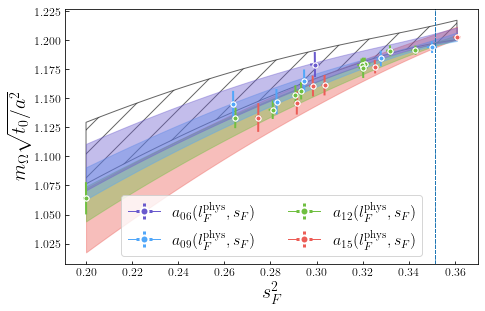

In [8]:
fit_manager.plot_fit('s', observable='t0')

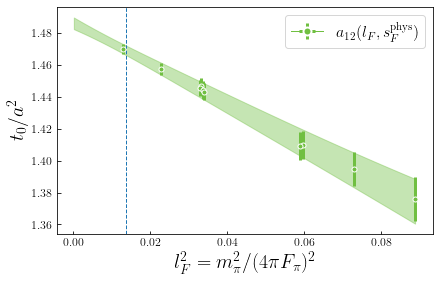

In [9]:
fit_manager.plot_interpolation(latt_spacing='a12', observable='t0')

In [10]:
print(fit_manager.fitter['t0'].fit_interpolation())

Least Square Fit:
  chi2/dof [dof] = 1.1 [22]    Q = 0.32    logGBF = 63.267

Parameters:
          c0a06       6.41 (44)      [     6.0 (1.0) ]  
          c0a09       2.49 (30)      [     3.0 (1.0) ]  
          c0a12       1.13 (25)      [     1.5 (1.0) ]  
          c0a15       0.63 (22)      [     1.0 (1.0) ]  
           k_ls      -0.1 (1.6)      [     0.0 (2.0) ]  
           k_aa      -0.6 (1.5)      [     0.0 (2.0) ]  
            k_l      -1.24 (66)      [     0.0 (2.0) ]  
           k_al       0.9 (1.2)      [     0.0 (2.0) ]  
           k_ll       1.4 (1.7)      [     0.0 (2.0) ]  
         k_ll_g       0.7 (1.3)      [     0.0 (2.0) ]  
           k_ss      -1.51 (97)      [     0.0 (2.0) ]  
           k_as       1.03 (83)      [     0.0 (2.0) ]  
            k_a       1.6 (1.0)      [     2.0 (2.0) ]  
            k_s       0.29 (41)      [     0.0 (2.0) ]  
          mpi 0   0.094560 (58)      [ 0.094560 (58) ]  
              1   0.059468 (62)      [ 0.059459 (63) ] 

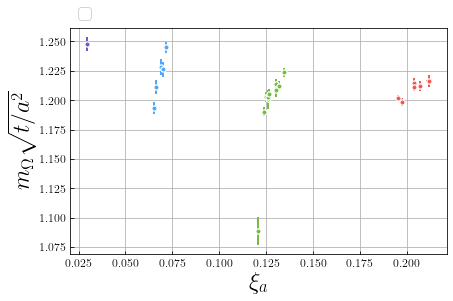

In [11]:
fit_manager.plot_parameters(xparam='a', yparam='t0')

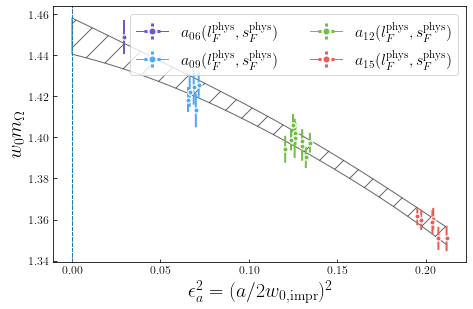

In [12]:
fit_manager.plot_fit('a', observable='w0')

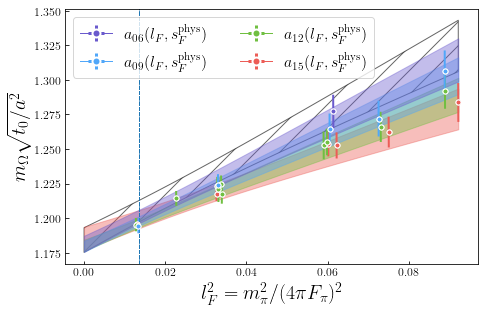

In [13]:
fit_manager.plot_fit('l', observable='t0')

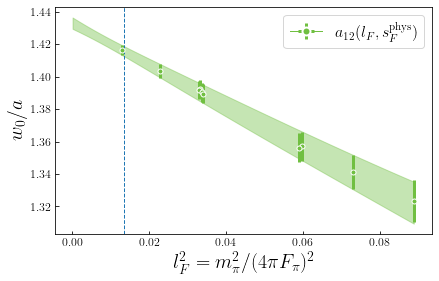

In [14]:
fit_manager.plot_interpolation('a12', observable='w0')

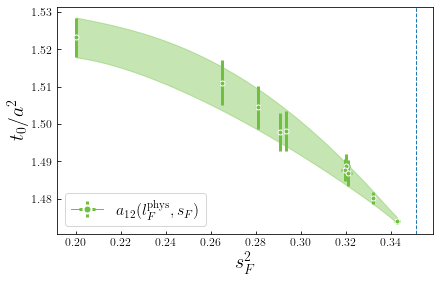

In [15]:
fit_manager.plot_interpolation('a12', param='s', observable='t0')